<a href="https://colab.research.google.com/github/ahcamachod/2162-clasificacion-validacion-de-modelos-y-metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [58]:
import pandas as pd

In [59]:
data = pd.read_csv('./data/prestacar.csv')

data

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [60]:
X = data.drop(columns='moroso', axis=1)
y = data.moroso

In [61]:
# modelo de  clasificacion de arbol
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

In [62]:
print(f'La exactitud del modelo es:{modelo.score(X,y)}')

La exactitud del modelo es:1.0


### **Utilidad del método score()**


Durante la construcción de un modelo para clasificar transacciones bancarias como legítimas o fraudulentas, una persona científica de datos utilizó la biblioteca Scikit-Learn, que ofrece diversos algoritmos de machine learning que pueden ser utilizados para la clasificación de datos. En cada uno de estos algoritmos, el método fit() se utiliza para entrenar un modelo a partir de las variables explicativas y la variable respuesta.

Sin embargo, después del entrenamiento del modelo, se realiza un paso más mediante el uso del método score().

    -   Se utiliza para evaluar el desempeño del modelo ajustado.

            El método score() tiene la finalidad de comparar las predicciones realizadas por el modelo con los valores reales de los datos y calcula una tasa de acierto en porcentaje llamada exactitud.  

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X, X_test, y, y_test = train_test_split(X,y,test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.15, stratify=y, random_state=5)

In [65]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de:{modelo.score(X_train,y_train)}\nLa exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')


La exactitud del modelo con el conjunto de entrenamiento es de:0.9207829473252716
La exactitud del modelo con el conjunto de validación es de: 0.9060821599651618


### **Para saber más: método holdout**

En el momento de validar modelos de clasificación, necesitamos verificar si el modelo está realmente generalizando, es decir, si está comprendiendo el patrón de los datos y clasificando correctamente datos nuevos. La estrategia más simple para evaluar esta generalización, conocida como holdout, consiste en dividir los datos en dos partes: un conjunto de datos de entrenamiento y otro de prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se usa para evaluar el rendimiento del modelo en datos no vistos anteriormente.

Con la ayuda de la imagen a continuación, analiza la ejemplificación del método holdout en funcionamiento:

![img valmodel1](./data/valmodel1.png)

En algunos casos, especialmente cuando se realizan ajustes finos en los parámetros del modelo, es útil tener un conjunto de validación adicional. En este caso, la división se hace en tres partes: conjunto de entrenamiento, conjunto de validación y conjunto de prueba. El conjunto de validación se utiliza en la comparación de diferentes modelos, en la selección del modelo más adecuado y en el ajuste de los hiperparámetros. Mientras tanto, el conjunto de prueba sigue utilizándose para evaluar el rendimiento final del modelo elegido, después de todo el proceso de ajuste.

Por eso, cuanto más se utilizan los mismos datos para tomar decisiones sobre configuraciones de mejoras en el modelo o elección de hiperparámetros, más comprometida se vuelve la confiabilidad de esos resultados al ser generalizados para datos nuevos y no vistos. Esto ocurre porque las mejoras se hacen a partir de esos datos de validación.

Es posible percibir que las mejoras aplicadas desempeñan un papel fundamental para resolver el problema. Sin embargo, para asegurar que el rendimiento del modelo permanezca consistente en relación a los datos del mundo real, que no fueron vistos en el entrenamiento o en la mejora de los modelos, la estrategia de la división entre 3 conjuntos de datos, como se puede analizar en la imagen siguiente, ofrece una buena dirección final, ya que indica si el modelo elegido está sesgado o no en relación a los datos de validación.


![img valmodel2](./data/valmodel2.png)

### Evaluando el modelo

In [66]:
# Usaremos la herramientras matriz de confusion
from sklearn.metrics import confusion_matrix

In [67]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[6226   62]
 [ 585   16]]


In [69]:
from sklearn.metrics import ConfusionMatrixDisplay


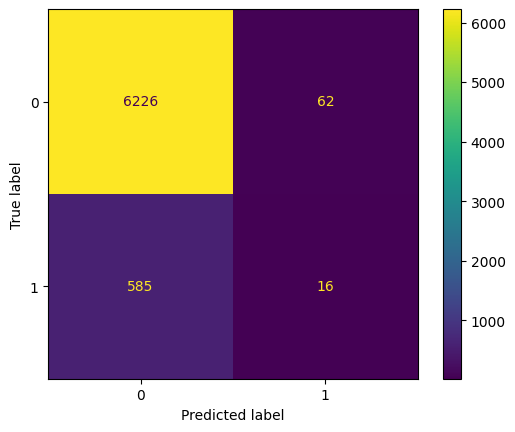

In [70]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

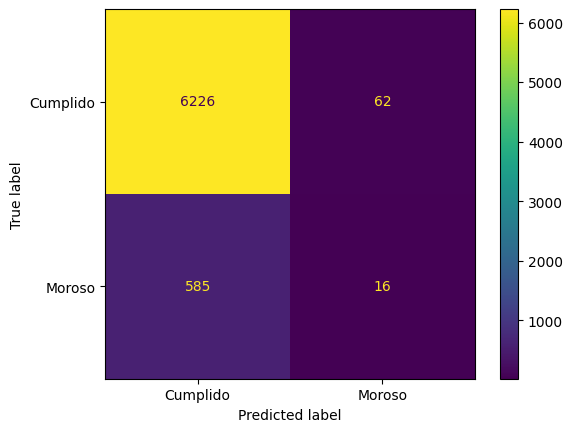

In [71]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizacion.plot();

### **Para saber más: entendiendo la matriz de confusión**

Para obtener una evaluación más completa del desempeño de modelos de clasificación, podemos utilizar una herramienta conocida como matriz de confusión. Esta matriz ofrece ventajas a la persona científica de datos, ya que permite entender cuántos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar información en una visualización para cada una de las categorías de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza cámaras para identificar personas que entran. La "matriz de confusión" se vuelve valiosa, ya que permite verificar cuántas veces el sistema acertó al identificar correctamente a las personas autorizadas, cuántas veces acusó erróneamente a personas y cuántas veces dejó pasar a personas no autorizadas. Con estos números, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisión en la detección de visitantes.

En la representación general de una matriz de confusión, para más detalles analiza la imagen a continuación, las filas de la matriz corresponden a los valores reales de la base de datos, mientras que las columnas corresponden a los valores previstos por el modelo de clasificación. Las categorías de la variable objetivo están representadas por el valor 0 (ausencia del atributo), también llamado negativo, y por el valor 1 (presencia del atributo), también llamado positivo.

![img matriz de confusion](./data/imgMatrizconfusion.png)


Cada elemento de la matriz está identificado por un nombre de acuerdo con la intersección entre la predicción y el valor real. La diagonal principal de la matriz, que está destacada por el color verde, representa los elementos que tienen la predicción igual al valor real, por lo tanto son los aciertos del modelo. Por otro lado, la diagonal secundaria, que está destacada por el color rojo, representa los elementos con predicciones diferentes del valor real, por lo tanto son los errores del modelo. La descripción de cada uno de los elementos es la siguiente:

- **Verdaderos Negativos (VN)**: Cuando el valor real es 0 y la predicción también es 0. Indica que el modelo clasificó correctamente los valores de la clase negativa.
- **Falsos Positivos (FP)**: Cuando el valor real es 0 y la predicción es 1. Indica que el modelo clasificó erróneamente un elemento de la clase negativa como si fuera de la clase positiva.
- **Falsos Negativos (FN)**: Cuando el valor real es 1 y la predicción es 0. Indica que el modelo clasificó erróneamente un elemento de la clase positiva como si fuera de la clase negativa.
- **Verdaderos Positivos (VP)**: Cuando el valor real es 1 y la predicción también es 1. Indica que el modelo clasificó correctamente los valores de la clase positiva.

Estos valores son muy útiles para un análisis más profundo del modelo de clasificación. Esto permite identificar las capacidades y limitaciones de la predicción, si hay un equilibrio entre los aciertos y errores o si el resultado está sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusión es una herramienta mucho más completa que la métrica de precisión, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.

### **Matriz de confusión**

Para evaluar un modelo de clasificación, podemos utilizar la precisión, que es un resultado general de aciertos del modelo expresado en porcentaje. Sin embargo, la precisión no siempre será suficiente para entender cómo está el desempeño del modelo.

Es posible utilizar la matriz de confusión para devolver un resultado más completo en relación al desempeño del modelo, conteniendo la cantidad de aciertos y errores del modelo para cada clase de la variable objetivo. Así, a partir de la matriz de confusión a continuación, que contiene los valores reales en las filas y valores predichos en las columnas y donde el valor 0 representa clientes cumplidores y 1 representa clientes morosos:

![img matriz de confusion](./data/MatrizConfusion.png)

20 representa a los clientes morosos que el modelo clasificó correctamente como morosos.

- Correcto, como la segunda fila representa a los clientes morosos reales y la segunda columna representa la predicción del modelo como morosos, 20 sería la cantidad de personas morosos que el modelo clasificó correctamente como morosos. 


### **Desafío: construyendo un segundo modelo**



Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

Como un consejo, revisa la documentación del algoritmo RandomForestClassifier. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.


## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [73]:
45/(45+123) # precision

0.26785714285714285

In [76]:

print(f'La precisión del modelo es: {precision_score(y_val, y_previsto):2%}')
print(f'La sensibilidad (recall) del modelo es: {recall_score(y_val, y_previsto):2%}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val, y_previsto):2%}')
print(f'El F1 del modelo es: {f1_score(y_val, y_previsto):2%}')

La precisión del modelo es: 20.512821%
La sensibilidad (recall) del modelo es: 2.662230%
La exactitud (accuracy) del modelo es: 90.608216%
El F1 del modelo es: 4.712813%


## **Para saber más: cuándo usar cada métrica**

Evaluar de manera adecuada el desempeño de un modelo de machine learning es esencial para asegurar que el modelo está resolviendo el problema de negocio que necesita ser solucionado. Existen diversas métricas que pueden ser utilizadas para evaluar el desempeño de los modelos de clasificación, cada una de ellas tiene ventajas y limitaciones. Estas métricas se calculan a partir de la comparación entre las clasificaciones realizadas por el modelo y los valores reales de la base de datos. Por lo tanto, pueden ser extraídas a partir de una matriz de confusión. Las principales métricas de clasificación son:

**Exactitud**

Es la métrica más común y básica en problemas de clasificación. Se utiliza para medir la proporción de datos previstos correctamente por el modelo en relación al total de los datos. Esta métrica es útil cuando las clases de la variable objetivo están balanceadas, es decir, cuando hay una cantidad equilibrada de datos para cada clase y una importancia equivalente de clasificación entre las categorías. Como ejemplo de utilización, tenemos el reconocimiento de dígitos manuscritos. Podemos utilizar imágenes de caracteres de letras y números para entrenar un modelo de clasificación para identificar correctamente la escritura. Como cada letra o número no tiene una importancia mayor que los demás, la exactitud se convierte en una buena métrica para medir la capacidad del modelo en clasificar correctamente los dígitos.

A continuación, podemos analizar el cálculo de la exactitud a partir de la matriz de confusión. Se calcula sumando los aciertos del modelo (VN + VP) y dividiendo por todos los aciertos y errores (VP + VN + FP + FN).

![img metricas exactitud](./data/imgMatrizconfusion2.png)


**Recuperación (recall)**

Mide la proporción de datos positivos que fueron correctamente identificados por el modelo, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos positivos como negativos. Se usa cuando el riesgo o costo de clasificar falsos negativos es alto. Por ejemplo, en casos de diagnóstico de enfermedades graves, donde es fundamental detectar correctamente la presencia de la enfermedad.

A continuación, podemos constatar el cálculo del recall a partir de la matriz de confusión. El recall solo toma en cuenta los valores positivos reales, es decir, los valores de la segunda fila de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos reales (VP + FN):

![img recall](./data/imgMatrizconfusion3.png)

**Precisión**

Mide la proporción de datos clasificados como positivos que son realmente positivos, es decir, revela la capacidad del modelo en evitar la clasificación incorrecta de datos negativos como positivos. Se usa cuando el riesgo o costo de clasificar falsos positivos es alto, por ejemplo, en casos de selección de acciones en el mercado financiero, donde lo importante es seleccionar acciones que tengan gran probabilidad de retorno, reduciendo la cantidad de acciones malas (falsos positivos) incluso si otras buenas acciones no han sido detectadas por el modelo (falso negativo). La precisión también es importante en el ejemplo de detección de enfermedades, donde queremos evitar que pacientes sanos sean erróneamente clasificados como enfermos.

A continuación, podemos analizar el cálculo de la precisión a partir de la matriz de confusión. La precisión solo toma en cuenta los valores positivos previstos por el modelo, es decir, los valores de la segunda columna de la matriz. Se calcula a partir de la división entre Verdaderos Positivos (VP) y la suma de todos los positivos previstos (VP + FP):

![img precision](./data/imgMatrizconfusion4.png)


**F1-Score**

Proporciona un equilibrio entre el recall y la precisión, siendo útil cuando las clases de la variable objetivo están desbalanceadas, es decir, cuando hay una cantidad de datos muy diferente para cada clase. Además, es aplicable cuando el riesgo o costo de falsos positivos y de falsos negativos es alto simultáneamente. En casos de detección de tumores en pacientes, es necesario tener un equilibrio entre evitar errores en la detección de tumores cuando la persona realmente los tiene y evitar errores al informar que una persona tiene un tumor cuando en realidad no lo tiene.

El cálculo del F1-Score se realiza a partir de la media armónica entre la precisión y el recall. Por lo tanto, equivale a 2 veces la precisión por el recall, dividido por la suma entre la precisión y el recall:

![img F1-score](./data/F1.png)

La elección de la métrica de clasificación adecuada depende del problema que se está resolviendo y de cada escenario. En los casos en que las clases están balanceadas y tienen importancia similar, la exactitud puede ser una buena métrica inicial. Sin embargo, cuando las clases están desequilibradas o los errores tienen costos diferentes, métricas como precisión, recall y F1-score son más indicadas.

### Curva ROC

In [77]:
from IPython.display import Image
# Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')
Image(url='./data/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [78]:
from sklearn.metrics import RocCurveDisplay

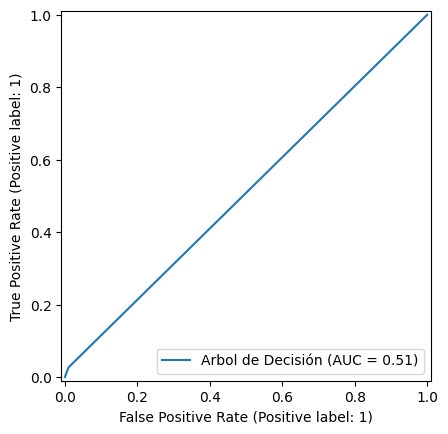

In [79]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Arbol de Decisión');

In [80]:
from sklearn.metrics import roc_auc_score

In [81]:
print(f'El area bajo la curva ROC es: {roc_auc_score(y_val, y_previsto):2%}')

El area bajo la curva ROC es: 50.838112%


### Curva de  precisión x sensibilidad

In [50]:
# Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')
Image(url='./data/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [82]:
from sklearn.metrics import PrecisionRecallDisplay

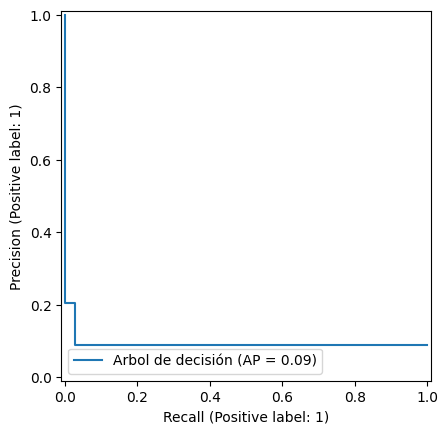

In [83]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Arbol de decisión');

In [86]:
from sklearn.metrics import average_precision_score

In [87]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val, y_previsto):2%}')

El score promedio de precision vs recall es: 9.037897%


## **Análisis gráfico**

Para un análisis más detallado del resultado de un modelo de clasificación, es posible explorar métricas numéricas, matrices de confusión e incluso gráficos. Entre los gráficos de análisis de rendimiento de modelos, dos se destacan: la curva ROC y la curva de precisión x recall.

- La curva de precisión x recall es mejor para evaluar datos que tienen clases más desbalanceadas.

    - Como la curva de precisión x recall no evalúa la tasa de verdaderos negativos, que generalmente contendrá la mayor cantidad de datos, el análisis se concentra más en la clase con menor cantidad de datos, y esto hace que el análisis sea mejor en datos desbalanceados.

### Informe de métricas

In [88]:
from sklearn.metrics import classification_report

In [91]:
target_name = ['valores reales', 'valores previstos']
print(classification_report(y_val, y_previsto, target_names=target_name))

                   precision    recall  f1-score   support

   valores reales       0.91      0.99      0.95      6288
valores previstos       0.21      0.03      0.05       601

         accuracy                           0.91      6889
        macro avg       0.56      0.51      0.50      6889
     weighted avg       0.85      0.91      0.87      6889



## **Contenido del informe de métricas**

Cuando se trata de evaluar un modelo de clasificación, no hay una sola opción para entender el comportamiento del modelo y determinar si está funcionando bien o no para el problema propuesto. Existen muchas métricas distintas, cada una con sus características, que pueden ser utilizadas en conjunto para la decisión final del análisis.

Una manera muy simple de resumir el resultado de un modelo es a partir del [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) o informe de clasificación. En él, es posible encontrar las principales métricas en una sola tabla. 

- Proporciona métricas como precisión, recall y f1-score, además de un promedio general y ponderado de las métricas entre las clases.

    - El informe presenta la precisión, recall y f1-score de cada clase, además de devolver un promedio de estas métricas de forma general o ponderada en relación a la cantidad de datos de cada clase.

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [105]:
from sklearn.model_selection import KFold, cross_validate

modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X,y,cv=kf)
cv_resultados

{'fit_time': array([0.26924706, 0.22421527, 0.22324896, 0.21333718, 0.22294807]),
 'score_time': array([0.00614071, 0.00408959, 0.0030179 , 0.00265336, 0.00548697]),
 'test_score': array([0.91311922, 0.90831882, 0.90744774, 0.91332753, 0.89949913])}

In [98]:
cv_resultados['test_score']

array([0.91366358, 0.90810105, 0.90766551, 0.91321864, 0.8997169 ])

In [99]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvio tipico es de: {desvio_std}')
print(f'El intervalo de confianza es de: [{promedio - 2 * desvio_std}, {min(promedio + 2 * desvio_std,1)}]')

El promedio de la exactitud es de: 0.9084731345038779
El desvio tipico es de: 0.005038312294203831
El intervalo de confianza es de: [0.8983965099154703, 0.9185497590922855]


## **Separación de los datos en KFold**

Con el fin de obtener un resultado más confiable del desempeño del modelo, podemos utilizar la validación cruzada con [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). Es un método de separación de los datos alternativo al hold-out y que brinda una mayor seguridad en la estimación de la métrica de desempeño del modelo.

- Los datos se dividen en k partes, donde 1 se utiliza para validación y el resto para entrenamiento.

    - El proceso de validación cruzada consiste en la creación de diversos modelos, uno para cada división realizada, utilizando 1 parte para validación y las demás para entrenamiento. En cada uno de los modelos se utiliza una parte diferente de validación. Al final, es posible extraer un promedio y un intervalo de confianza con los resultados de los modelos. 

### Validación cruzada con sensibilidad

In [100]:
def intervalo_confianza(resultado):
    promedio = resultado['test_score'].mean()
    desvio_std = resultado['test_score'].std()
    
    return f'El intervalo de confianza es de: [{promedio - 2 * desvio_std}, {min(promedio + 2 * desvio_std,1)}]'

In [107]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X,y,cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.42850423, 0.43856978, 0.49986315, 0.55075479, 0.52577376]),
 'score_time': array([0.01128292, 0.02193952, 0.01853681, 0.05301905, 0.02430129]),
 'test_score': array([0.02774108, 0.0210396 , 0.01845018, 0.01436031, 0.02427746])}

In [108]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de: [0.011938076355094116, 0.030409380304432476]'

## **Desafío: validación con otras métricas**



Es siempre importante analizar el problema de negocio antes de evaluar un modelo de clasificación, para que se elija la métrica más adecuada. En nuestro proyecto, estamos clasificando clientes morosos de una agencia de alquiler de vehículos e identificamos que la métrica más relevante es el recall, que busca minimizar la cantidad de personas morosas que son clasificadas como cumplidoras.

Para obtener un resultado completo de las métricas en la validación cruzada así como el classification_report, es necesario utilizar el método cross_validate e informar en el parámetro scoring las métricas a evaluar.

Como desafío, construye un código para generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:

- Exactitud
- Recall
- Precisión
- F1-score

Un consejo es explorar la documentación del método <mark>cross_validate</mark> a partir de este [material de apoyo](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate), donde puedes descubrir una forma más simple de retornar las métricas de una sola vez con una lista de cadenas.


### Estratificando los datos

In [109]:
data['moroso'].value_counts()

moroso
0    49309
1     4716
Name: count, dtype: int64

In [110]:
from sklearn.model_selection import StratifiedKFold

In [113]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X,y,cv=skf, scoring='recall')

In [ ]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de: [0.01931224742184242, 0.03756117451644544]'

## **Para saber más: otros métodos de validación**

Además de la validación cruzada con <mark>KFold</mark> tradicional y estratificada, existen otros tipos de validación que pueden ser utilizados en proyectos de machine learning. La elección de su uso dependerá de las características de los datos del proyecto. Vamos a explorar más adelante tres nuevos enfoques de separación de los datos utilizados para simular el proceso de aprendizaje en datos futuros.

**GroupKFold**

El método <mark>GroupKFold</mark> es una variación de la validación cruzada KFold tradicional y se utiliza cuando los datos tienen alguna estructura de grupo o dependencia que no debe ser rota, generalmente una característica en una de las columnas de la base de datos.

Este enfoque utiliza una estrategia de separación de los datos para que los registros pertenecientes a un grupo específico se mantengan juntos durante las divisiones del KFold, garantizando que no sean separados entre los conjuntos de entrenamiento y validación. Esto es útil para evitar posibles sesgos y garantizar que el modelo generalice para grupos desconocidos, es decir, incluso si no hay datos del grupo en el conjunto de entrenamiento, el modelo deberá tener un buen desempeño al predecir el resultado para los datos de ese grupo.

**Leave-p-out**

El método <mark>Leave-p-out</mark> funciona de manera diferente al método KFold. En lugar de dividir el conjunto de datos en una cantidad fija de conjuntos, se elegirá una cantidad 'p' de elementos para ser dejados fuera del entrenamiento. Los datos se entrenarán en el resto y se validarán solo en los 'p' elementos. Este proceso se repite hasta que todos los datos se utilicen como datos de validación. El resultado final puede considerarse el promedio de los resultados obtenidos en los modelos, tal como se hace en la validación cruzada tradicional.

Esto proporciona una validación mucho más completa, ya que considera todas las combinaciones posibles de datos de entrenamiento y validación. Sin embargo, es mucho más costosa computacionalmente, ya que se crearán muchos modelos y esto aumenta a medida que el conjunto de datos es muy grande y el valor elegido para 'p' es pequeño.

**Leave-one-out**

El método <mark>Leave-one-out</mark> es una forma especial del Leave-p-out, donde se elige el valor de p=1. De esta manera, solo se reserva una muestra para validación y todos los demás datos se eligen para entrenamiento. Este proceso se repite para todas las muestras de la base de datos. Esto significa que, si hay 1000 filas en la base de datos, se entrenarán 1000 modelos distintos.

Se espera que este método demande mucho computacionalmente, debido a la creación de un modelo para cada fila de la base de datos. Por lo tanto, se indica solo en los casos en que la base de datos es muy pequeña. En estas situaciones, es interesante utilizar la mayor cantidad de datos posible para el entrenamiento, para que el modelo pueda entender el patrón de los datos. Otra estrategia de validación cruzada eliminaría muchos datos que serían útiles en el entrenamiento.

Si deseas saber más sobre otros métodos de validación disponibles en la biblioteca Scikit-Learn, puedes consultar la documentación [Validación cruzada: evaluando el desempeño del estimador](https://scikit-learn.org/stable/modules/cross_validation.html).

Si quieres crear una visualización para tener un mejor entendimiento de cómo se realizó la división de los datos en algún proyecto, ya sea con KFold, StratifiedKFold o GroupKFold, puedes explorar la documentación [Visualizando el comportamiento de validación cruzada en scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html).

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo